In [43]:
import numpy as np
import pandas as pd
import pickle #to save model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



In [44]:

df = pd.read_csv("input/Admission_Predict.csv",sep = ",")
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [45]:
X=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Normalisation works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

In [47]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [48]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)
    filename = name+'.sav'
    pickle.dump(model, open(filename, 'wb'))

Results...

Linear Regression : 0.0769745219608656
Decision Tree Regression : 0.11914801718870524
Random Forest Regression : 0.07366229530770814
Gradient Boosting Regression : 0.07280566663475711
Ada Boosting Regression : 0.08141134997555124
Extra Tree Regression : 0.07685563821217029
K-Neighbors Regression : 0.09130553104823387
Support Vector Regression : 0.13567695865096108


In [49]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax=reg_pred

<AxesSubplot:>

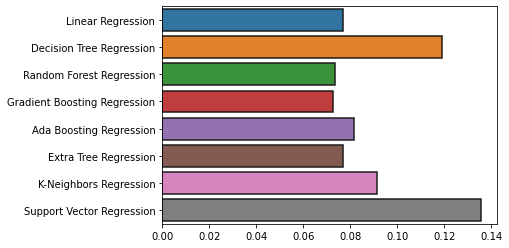

In [50]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [52]:
#If Chance of Admit greater than 80% we classify it as 1
y_train_c = [1 if each > 0.8 else 0 for each in y_train]
y_test_c  = [1 if each > 0.8 else 0 for each in y_test]

In [53]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]


for name,model in classifiers:
    model=model
    model.fit(X_train,y_train_c)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test_c,predictions))
    print(name,accuracy_score(y_test_c,predictions))
    filename = name+'.sav'
    pickle.dump(model, open(filename, 'wb'))

Logistic Regression : 0.9125
Decision Tree Classification : 0.9375
Random Forest Classification : 0.9375
Gradient Boosting Classification : 0.9125
Ada Boosting Classification : 0.9125
Extra Tree Classification : 0.95
K-Neighbors Classification : 0.9375
Support Vector Classification : 0.85
Gausian Naive Bayes : 0.9375


In [54]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_ax=cla_pred

Text(0.5, 0, 'Accuracy')

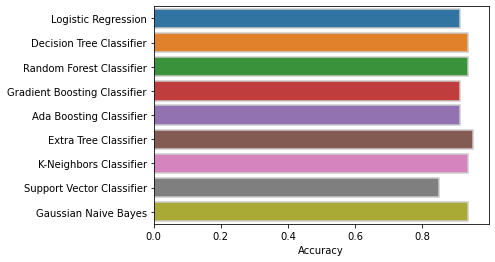

In [55]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.8")
plt.xlabel('Accuracy')